In [1]:
import warnings
warnings.filterwarnings("ignore") 


In [2]:
import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker
import folium
from folium import Choropleth, Circle, Marker
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
%matplotlib inline


## Loading and Displaying Well Log Data from LAS


## Introduction
[Log ASCII standard (LAS)](https://en.wikipedia.org/wiki/Log_ASCII_standard#:~:text=Log%20ASCII%20standard%20(LAS)%20is,subsurface%20stratigraphy%20in%20a%20well) is a standard file format common in the oil-and-gas and water well industries to store well log information. Well logging is used to investigate and characterize the subsurface stratigraphy in a well.

Its structured file format that was developed in 1980 by the Canadian Well Logging Society and it is used to store log curve data as well as information about the well.

You can use various softwares to lookat the LAS data. To open and manupulate in python you can either write your own script or use available developed packages. Here, I will use 'lasio'.
More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [3]:
import lasio


In [4]:
well = lasio.read("48_10b-_9_jwl_JWL_FILE_1682139.las")
well

In [5]:
well.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [6]:
well.sections['Well']

[HeaderItem(mnemonic="STRT", unit="F", value="181.1024", descr="Top Depth"),
 HeaderItem(mnemonic="STOP", unit="F", value="12631.2336", descr="Bottom Depth"),
 HeaderItem(mnemonic="STEP", unit="F", value="0.6562", descr="Depth Increment"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="Null Value"),
 HeaderItem(mnemonic="FLD", unit="", value="EXPLORATION", descr="Field Name"),
 HeaderItem(mnemonic="COMP", unit="", value="BP EX OPE C", descr="OPERATOR"),
 HeaderItem(mnemonic="LOC", unit="", value="", descr="FIELD LOCATION"),
 HeaderItem(mnemonic="CNTY", unit="", value="", descr="COUNTY"),
 HeaderItem(mnemonic="STAT", unit="", value="0", descr="STATE"),
 HeaderItem(mnemonic="CTRY", unit="", value="UK", descr="COUNTRY"),
 HeaderItem(mnemonic="SRVC", unit="", value="", descr="LOGGING COMPANY CODE"),
 HeaderItem(mnemonic="DATE", unit="", value="", descr="RUN DATE"),
 HeaderItem(mnemonic="WN", unit="", value="48/10B- 9", descr="NAME"),
 HeaderItem(mnemonic="WBN", unit="", valu

In [7]:
for i in well.sections['Well']:
    print(f"{i.descr} ({i.mnemonic},{i.unit}): \t\t {i.value}")

Top Depth (STRT,F): 		 181.1024
Bottom Depth (STOP,F): 		 12631.2336
Depth Increment (STEP,F): 		 0.6562
Null Value (NULL,): 		 -999.25
Field Name (FLD,): 		 EXPLORATION
OPERATOR (COMP,): 		 BP EX OPE C
FIELD LOCATION (LOC,): 		 
COUNTY (CNTY,): 		 
STATE (STAT,): 		 0
COUNTRY (CTRY,): 		 UK
LOGGING COMPANY CODE (SRVC,): 		 
RUN DATE (DATE,): 		 
NAME (WN,): 		 48/10B- 9
WELLBORE (WBN,): 		 48/10B- 9
COUNTRY (NATI,): 		 UK
BIT SIZE 1 (BS1,): 		 0.0
BIT SIZE 2 (BS2,): 		 0.0
CSG 1 DRILL DEP (CBD1,): 		 0.000 M
CSG 1 LOG DEP (CBL1,): 		 0.000 M
CSG 1 SIZE (CS1,): 		 0.0
CSG 1 WT (CW1,): 		 0.0
CSG 2 DRILL DEP (CBD2,): 		 0.000 M
CSG 2 LOG DEP (CBL2,): 		 0.000 M
CSG 2 SIZE (CS2,): 		 0.0
CSG 2 WT (CW2,): 		 0.0
RIG NAME (COUN,): 		 NULL
SPUD DATE (SPUD,): 		 1990/08/26
SURF. LATITUDE (LATI,): 		 53:43: 5.67984N
SURF. LONGITUDE (LONG,): 		 1:52:24.24000E
TD 1 DRILLER (BSD1,): 		 0.000 M
TD 2 DRILLER (BSD2,): 		 0.000 M
API NUMBER (ZZZZ,): 		 4177
UTM ZONE (UTZC,): 		 31
SURF. UTM E (UTME,

In [8]:
well.curves.keys()

['DEPT',
 'CALI',
 'ILM',
 'ILD',
 'DT',
 'TENS',
 'CGR',
 'DTL',
 'RHOB',
 'DRHO',
 'PEF',
 'NPHI',
 'THOR',
 'URAN',
 'GR',
 'POTA']

To see what curves are present within the las file, we can repeat the process with the Curve Item object and call upon the `unit` and `descr` functions to get info on the units and the curve's description.
The enumerate function allows us to keep a count of the number of curves that are present within the file. As enumerate returns a 0 on the first loop, we need to 1 to it if we want to include the depth curve.

In [9]:
for i, curve in enumerate(well.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are: {i+1} curves in this file")

Curve: DEPT, 	 Units: F, 	 Description: 1  DEPTH
Curve: CALI, 	 Units: IN, 	 Description: 2  CALI
Curve: ILM, 	 Units: OHMM, 	 Description: 3  ILM
Curve: ILD, 	 Units: OHMM, 	 Description: 4  ILD
Curve: DT, 	 Units: US/F, 	 Description: 5  DT
Curve: TENS, 	 Units: LB, 	 Description: 6  TENS
Curve: CGR, 	 Units: GAPI, 	 Description: 7  CGR
Curve: DTL, 	 Units: US/F, 	 Description: 8  DTL
Curve: RHOB, 	 Units: G/C3, 	 Description: 9  RHOB
Curve: DRHO, 	 Units: G/C3, 	 Description: 10  DRHO
Curve: PEF, 	 Units: NULL, 	 Description: 11  PEF
Curve: NPHI, 	 Units: %, 	 Description: 12  NPHI
Curve: THOR, 	 Units: PPM, 	 Description: 13  THOR
Curve: URAN, 	 Units: PPM, 	 Description: 14  URAN
Curve: GR, 	 Units: GAPI, 	 Description: 15  GR
Curve: POTA, 	 Units: NULL, 	 Description: 16  POTA
There are: 16 curves in this file


### you can delete make changes and write the file in a new .las file

In [10]:
well.sections['Well']['CTRY'] = 'Norway'

## Converting LAS File to a Pandas Dataframe
Data loaded in using LASIO can be converted to a pandas dataframe using the .df() function. This allows us to easily plot data and pass it into one of the many machine learning algorithms.

In [11]:
df = well.df()
df

,CALI,ILM,ILD,DT,TENS,CGR,DTL,RHOB,DRHO,PEF,NPHI,THOR,URAN,GR,POTA
DEPT,,,,,,,,,,,,,,,
181.1024,NaN,NaN,NaN,NaN,771.2344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.5620,NaN
181.7585,NaN,NaN,NaN,NaN,771.1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.6920,NaN
182.4147,NaN,NaN,NaN,NaN,771.0713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7963,NaN
183.0709,NaN,NaN,NaN,NaN,770.9902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.6101,NaN
183.7270,NaN,NaN,NaN,NaN,770.9111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.7897,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12628.6089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6924,0.0655,5.0506,NaN,NaN,NaN,NaN,NaN
12629.2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7019,0.0671,5.2300,NaN,NaN,NaN,NaN,NaN
12629.9213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7175,0.0775,5.5663,NaN,NaN,NaN,NaN,NaN


## missing data / duplicated data / outliers / spliting data / scaling

In [12]:
df.replace(-999.25, np.nan, inplace=True)

In [13]:
df.isna().sum()

CALI     3743
ILM      3594
ILD      3594
DT       3678
TENS       40
CGR     12164
DTL     12374
RHOB    17795
DRHO    17795
PEF     17795
NPHI    17805
THOR    12022
URAN    12022
GR         35
POTA    12022
dtype: int64

In [14]:
all_cols = df.isnull().sum()[(df.isnull().sum()/df.shape[0])<0.5].index

In [15]:
all_cols

Index(['CALI', 'ILM', 'ILD', 'DT', 'TENS', 'GR'], dtype='object')

In [16]:
imputer = SimpleImputer(strategy="mean") 
imputer.fit(df[all_cols]) 
df[all_cols] = imputer.transform(df[all_cols]) 

In [17]:
df.duplicated().sum()

0

### For splitting data ... 
NOTE: **some time we have a couple of wells scatterd in different location. What is the bes solution?

! hint
We need to ensure generalization, we can check if we have latitude and longitude. If yes, in order to do a proper train-test-split, we need to plot the data to inspect its geographic distribution:

In [18]:
df2 = df[all_cols].drop('TENS', axis=1)

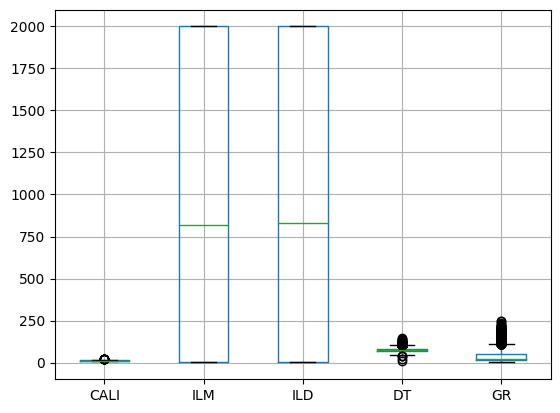

In [19]:
df2.boxplot();

## EDA

In [20]:
df[all_cols].describe()

,CALI,ILM,ILD,DT,TENS,GR
count,18975.000000,18975.000000,18975.000000,18975.000000,18975.000000,18975.000000
mean,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222
std,1.932749,875.996155,880.016652,11.731348,16049.645380,30.447347
min,8.266000,0.301700,0.250300,11.897200,-32752.000000,3.792000
25%,9.343700,1.127600,1.071400,67.384000,-32752.000000,17.421750
50%,11.370851,821.026369,833.063242,75.782352,767.665000,22.991900
75%,12.703850,2000.000000,2000.000000,82.092000,823.550800,53.616000
max,18.546900,2000.000000,2000.000000,143.172600,986.040000,246.812000


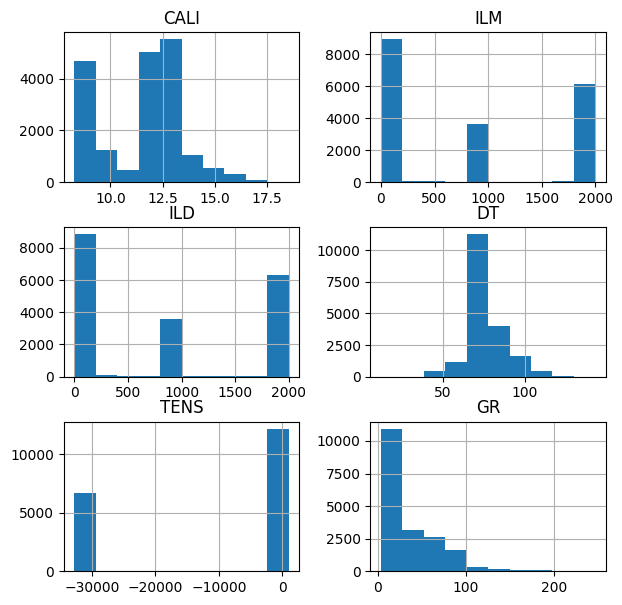

In [21]:
num_data = df[all_cols].select_dtypes(include = np.number)
num_data.hist(figsize=(7,7));

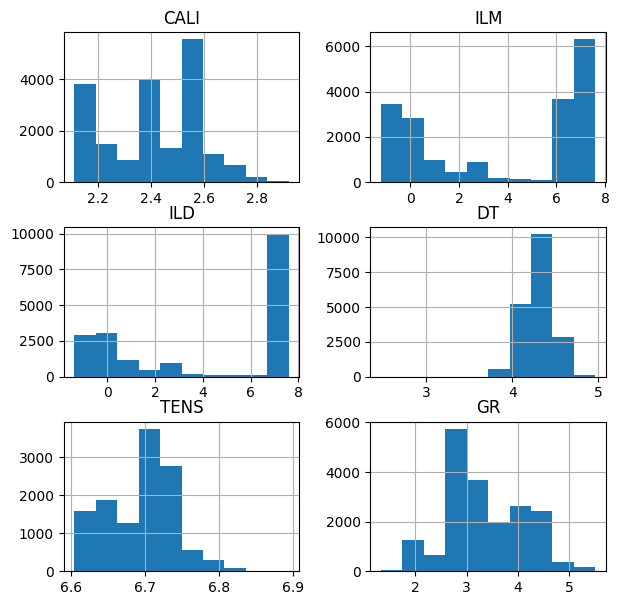

In [22]:
np.log(df[all_cols]).hist(figsize=(7,7));

Scatterplots and correlation heatmap can be used routinely as part of the interpretation workflow within petrophysics. They allow us to determine key interpretation parameters such as 

- clay and shale end points for our clay or shale volume calculations
- outlier detection
- lithology identification
- hydrocarbon identification
- rock typing
- regression analysis
- and more


In [23]:
df = df[all_cols]

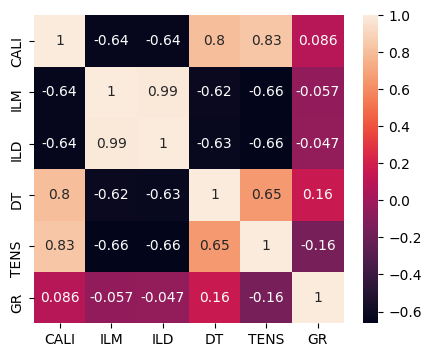

In [24]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

sns.heatmap(df.corr(), annot=df.corr(), ax=ax);


<function matplotlib.pyplot.show(close=None, block=None)>

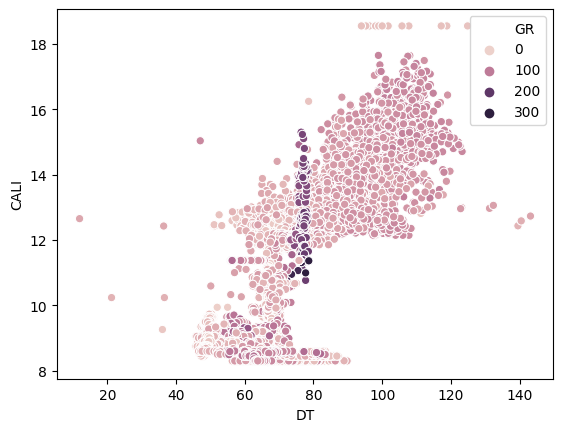

In [25]:
sns.scatterplot(x = df['DT'], y=df['CALI'], hue=df['GR'])
plt.show

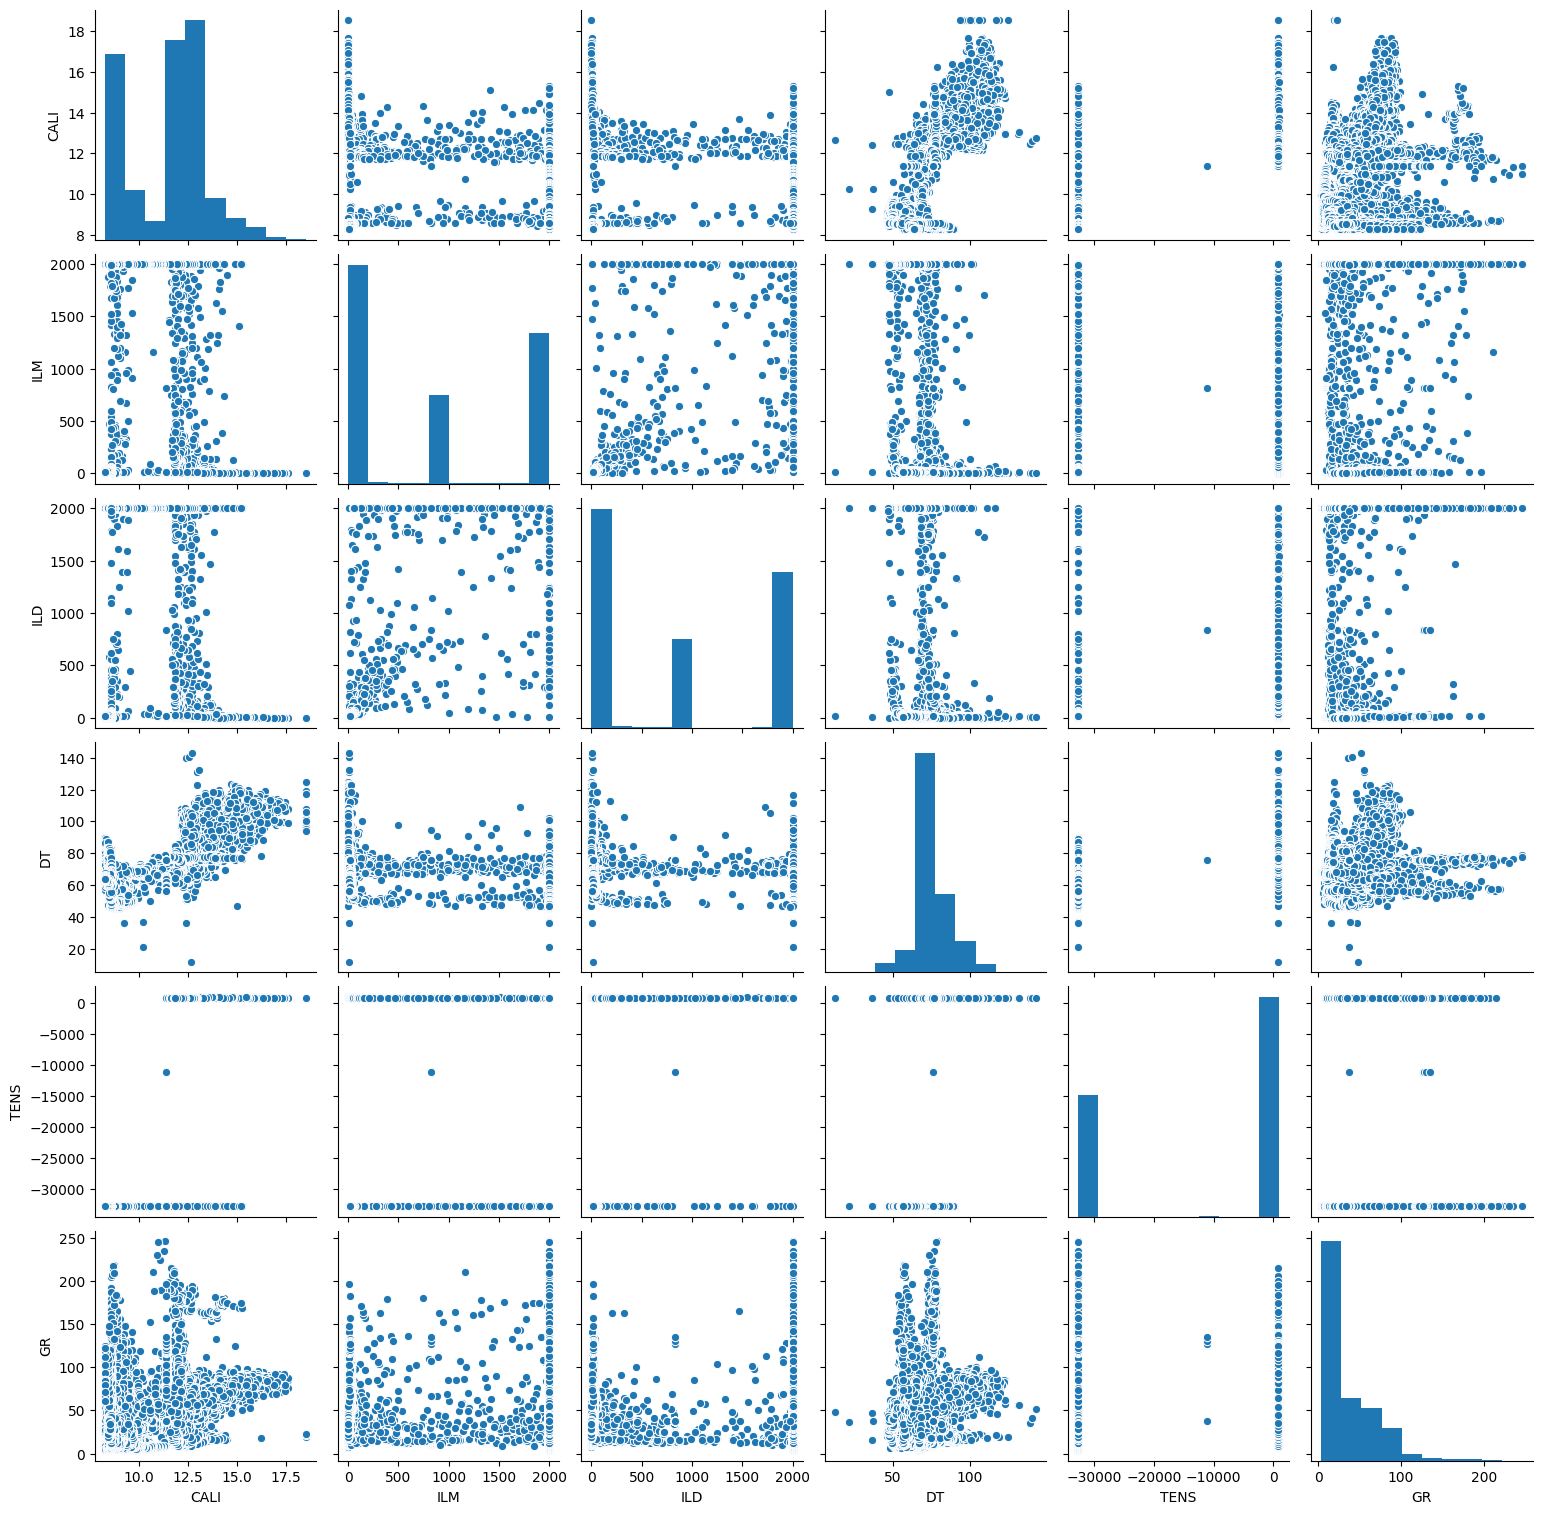

In [26]:
sns.pairplot(df)


Well log plots are a common visualization tool within geoscience and petrophysics. They allow easy visualization of data (for example, Gamma Ray, Neutron Porosity, Bulk Density, etc) that has been acquired along the length (depth) of a wellbore. On these plots we display our logging measurements on the x axis and measure depth or true vertical depth on the y-axis.



(4400.0, 4000.0)

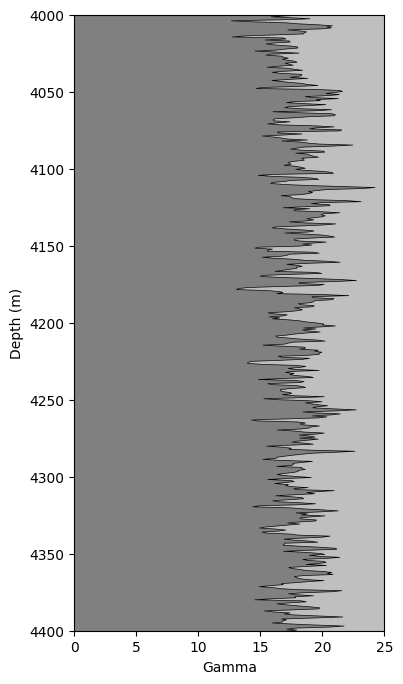

In [27]:
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(df['GR'], df.index, c='black', lw=0.5)
ax.set_xlabel("Gamma")
ax.set_ylabel("Depth (m)")
# Add fill_betweenx
plt.fill_betweenx(df.index, 0, df['GR'], facecolor='gray')
plt.fill_betweenx(df.index, df['GR'], 25, facecolor='gray', alpha= .5)
plt.xlim(0, 25)
plt.ylim(4400, 4000)

In [28]:
df['Log_ILD'] = np.log(df['ILD']+0.000001)
df['Log_ILM'] = np.log(df['ILM']+0.000001)


In [29]:
df.reset_index(inplace=True)

In [30]:
df

,DEPT,CALI,ILM,ILD,DT,TENS,GR,Log_ILD,Log_ILM
0,181.1024,11.370851,821.026369,833.063242,75.782352,771.234400,13.562000,6.72511,6.710555
1,181.7585,11.370851,821.026369,833.063242,75.782352,771.152300,13.692000,6.72511,6.710555
2,182.4147,11.370851,821.026369,833.063242,75.782352,771.071300,14.796300,6.72511,6.710555
3,183.0709,11.370851,821.026369,833.063242,75.782352,770.990200,16.610100,6.72511,6.710555
4,183.7270,11.370851,821.026369,833.063242,75.782352,770.911100,17.789700,6.72511,6.710555
...,...,...,...,...,...,...,...,...,...
18970,12628.6089,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222,6.72511,6.710555
18971,12629.2651,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222,6.72511,6.710555
18972,12629.9213,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222,6.72511,6.710555
18973,12630.5774,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222,6.72511,6.710555


In [31]:
features = df.drop(columns=['ILD','ILM','DEPT','TENS'])
features


,CALI,DT,GR,Log_ILD,Log_ILM
0,11.370851,75.782352,13.562000,6.72511,6.710555
1,11.370851,75.782352,13.692000,6.72511,6.710555
2,11.370851,75.782352,14.796300,6.72511,6.710555
3,11.370851,75.782352,16.610100,6.72511,6.710555
4,11.370851,75.782352,17.789700,6.72511,6.710555
...,...,...,...,...,...
18970,11.370851,75.782352,37.449222,6.72511,6.710555
18971,11.370851,75.782352,37.449222,6.72511,6.710555
18972,11.370851,75.782352,37.449222,6.72511,6.710555
18973,11.370851,75.782352,37.449222,6.72511,6.710555


In [32]:
features.corr()

,CALI,DT,GR,Log_ILD,Log_ILM
CALI,1.000000,0.801912,0.086109,-0.637433,-0.641954
DT,0.801912,1.000000,0.156718,-0.644182,-0.646752
GR,0.086109,0.156718,1.000000,-0.061011,-0.066509
Log_ILD,-0.637433,-0.644182,-0.061011,1.000000,0.997108
Log_ILM,-0.641954,-0.646752,-0.066509,0.997108,1.000000


In [33]:
features.drop(columns=['Log_ILM'],inplace=True)


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


In [35]:
x_scaled = scale(features)
x_scaled


array([[ 0.        ,  0.        , -0.78456266,  0.75088267],
       [ 0.        ,  0.        , -0.78029288,  0.75088267],
       [ 0.        ,  0.        , -0.74402276,  0.75088267],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.75088267],
       [ 0.        ,  0.        ,  0.        ,  0.75088267],
       [ 0.        ,  0.        ,  0.        ,  0.75088267]])

In [36]:
wcss = []

cl_num = 12
for i in range (1,cl_num):
    kmeans= KMeans(i, random_state=10)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss


[75899.99999999994,
 40145.36046226053,
 30408.77564507967,
 22315.09839665895,
 16860.516316443947,
 14173.549383057416,
 12495.55323241124,
 10855.289727234764,
 9627.524017184134,
 8625.162383878653,
 7695.74540825848]

Text(0, 0.5, 'Within-cluster Sum of Squares')

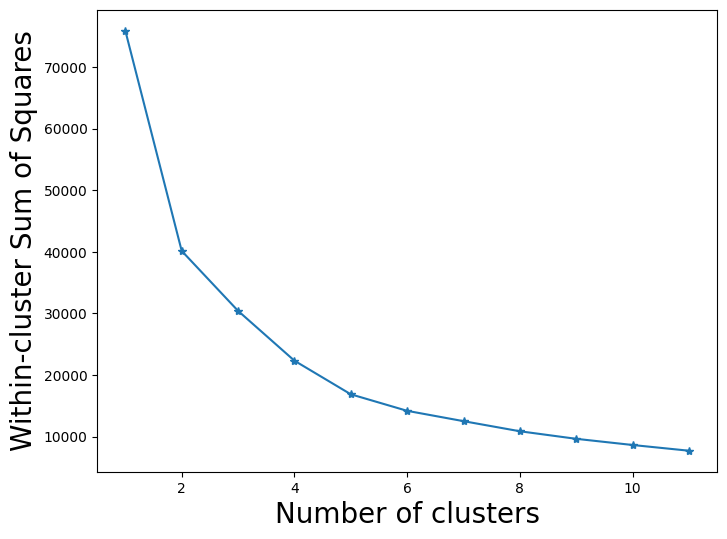

In [37]:
number_clusters = range(1,cl_num)
plt.figure(figsize=(8,6))
plt.plot(number_clusters, wcss,'*-' )
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Within-cluster Sum of Squares',fontsize=20)


[silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) is a function of sklearn.metrics. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [38]:
from sklearn.metrics import silhouette_score


In [39]:
range_n_clusters = [4,5,6,7,8,9]

for n_clusters  in range_n_clusters:
     
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_scaled)
    
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 4 The average silhouette_score is : 0.4720957102379542
For n_clusters = 5 The average silhouette_score is : 0.47526018056527347
For n_clusters = 6 The average silhouette_score is : 0.4922754875798699
For n_clusters = 7 The average silhouette_score is : 0.4828676383802623
For n_clusters = 8 The average silhouette_score is : 0.4935590476810494
For n_clusters = 9 The average silhouette_score is : 0.474390999385627


In [40]:
kmeans_ = KMeans(8,n_init=100)
kmeans_.fit(x_scaled) 
df['Facies_pred']=kmeans_.fit_predict(x_scaled) 


In [41]:

facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD']

facies_labels = ['As', 'Aw', 'Ss(F)', 'Ss(A)', 'Ssm',
                 'Sm', 'F(r/a)','F']


In [42]:
df

,DEPT,CALI,ILM,ILD,DT,TENS,GR,Log_ILD,Log_ILM,Facies_pred
0,181.1024,11.370851,821.026369,833.063242,75.782352,771.234400,13.562000,6.72511,6.710555,2
1,181.7585,11.370851,821.026369,833.063242,75.782352,771.152300,13.692000,6.72511,6.710555,2
2,182.4147,11.370851,821.026369,833.063242,75.782352,771.071300,14.796300,6.72511,6.710555,2
3,183.0709,11.370851,821.026369,833.063242,75.782352,770.990200,16.610100,6.72511,6.710555,2
4,183.7270,11.370851,821.026369,833.063242,75.782352,770.911100,17.789700,6.72511,6.710555,2
...,...,...,...,...,...,...,...,...,...,...
18970,12628.6089,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222,6.72511,6.710555,2
18971,12629.2651,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222,6.72511,6.710555,2
18972,12629.9213,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222,6.72511,6.710555,2
18973,12630.5774,11.370851,821.026369,833.063242,75.782352,-11128.666414,37.449222,6.72511,6.710555,2


In [43]:
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]


In [44]:
import makeplot as mk

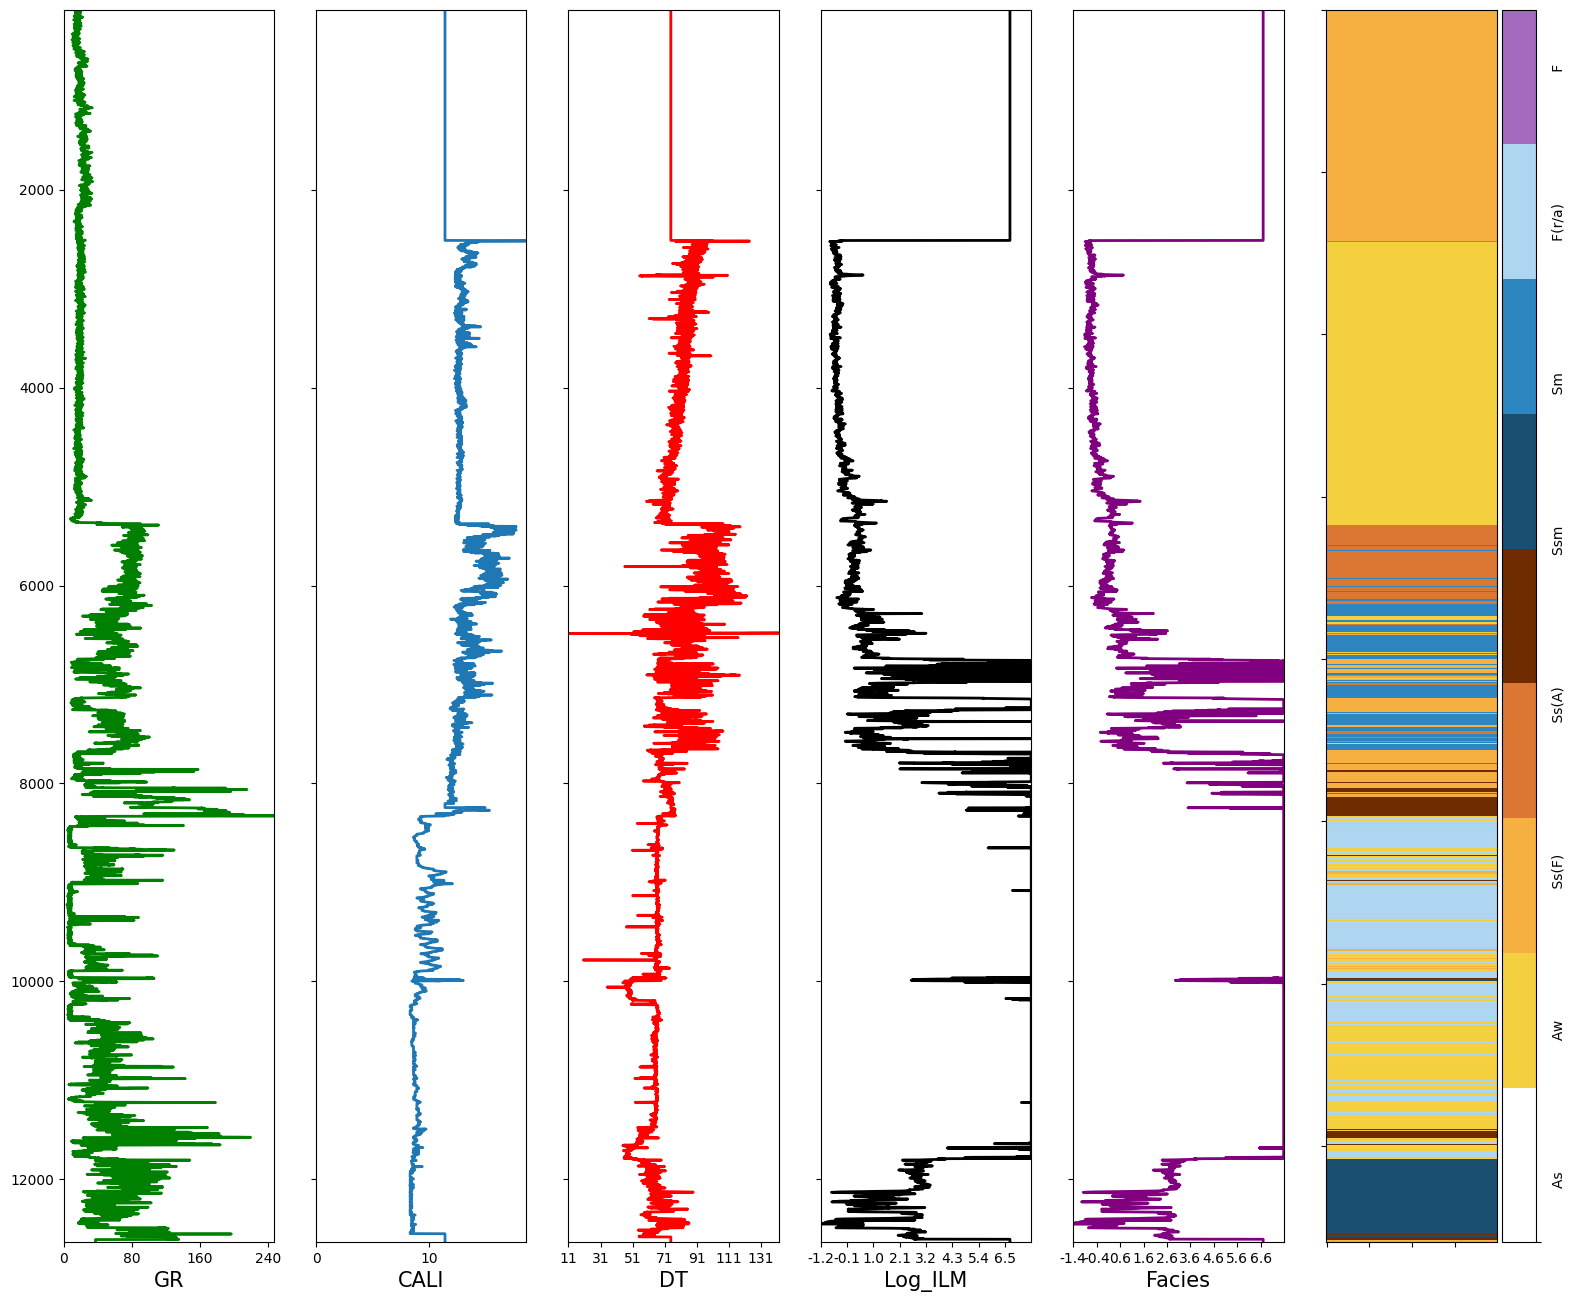

In [45]:
mk.facies_plot(
    df,
    facies_colors)

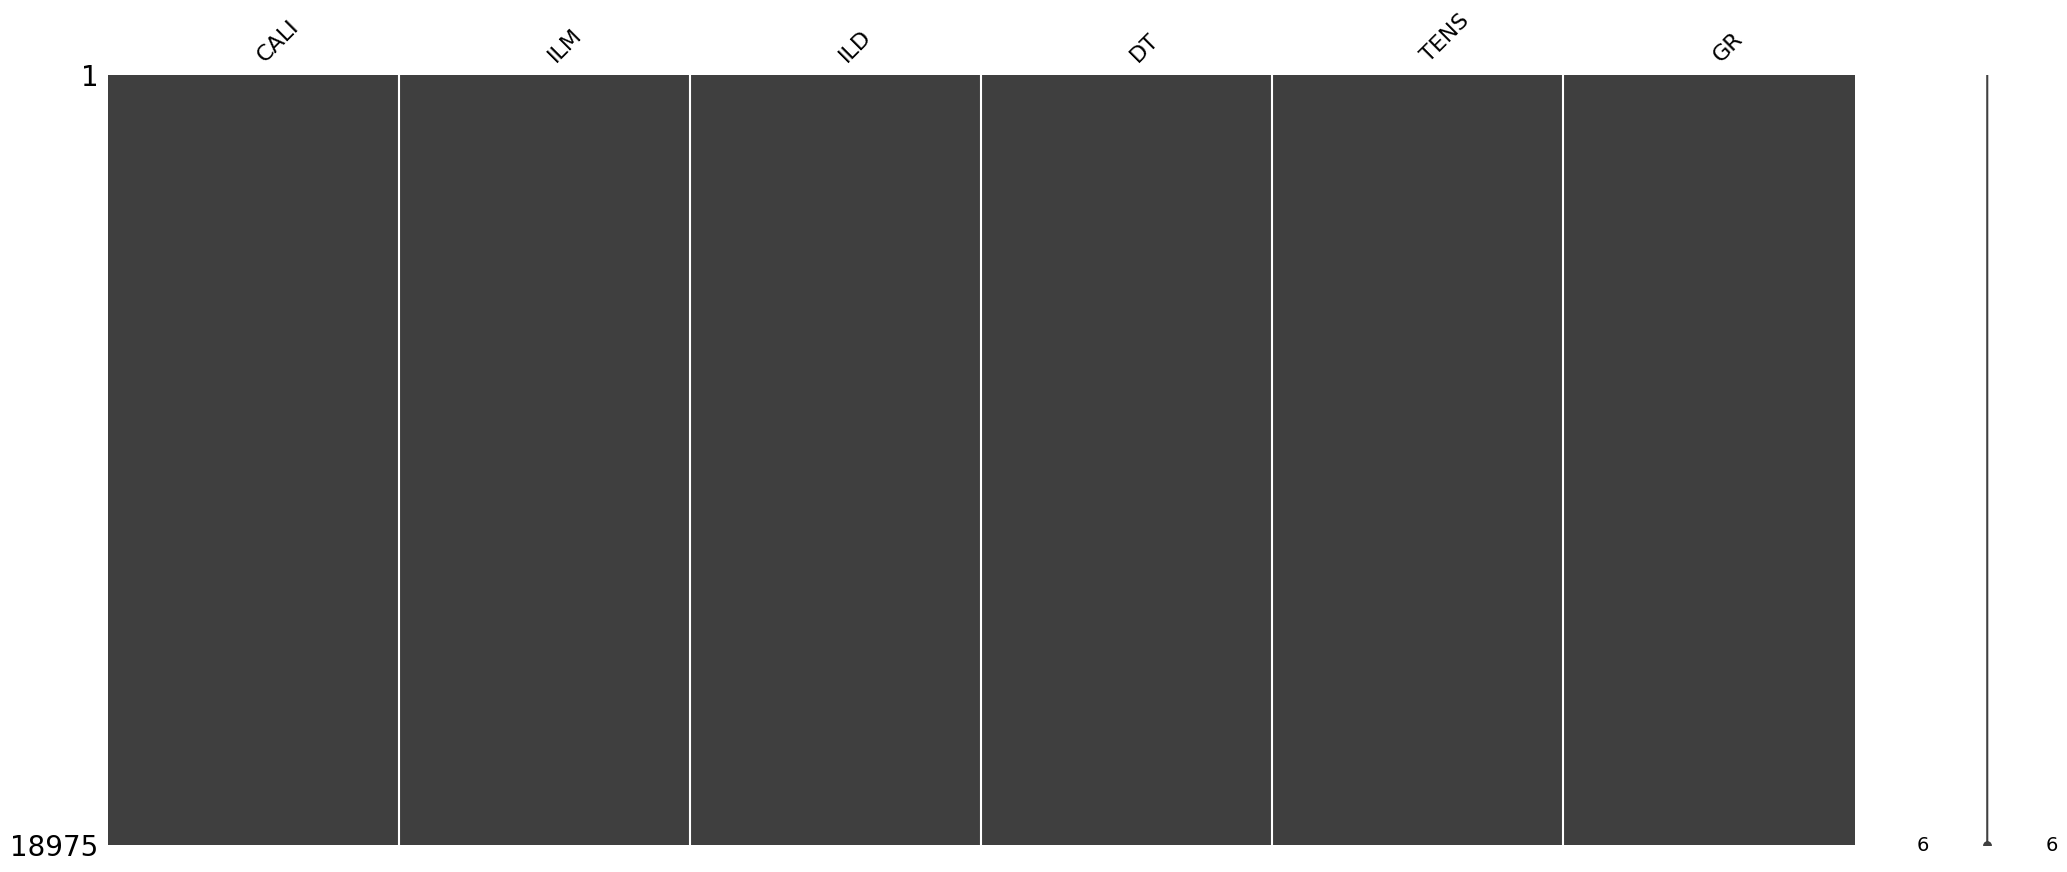

In [46]:
import missingno as msno
msno.matrix(df[all_cols]);